In [57]:
import pandas as pd
import shap
import sklearn

In [58]:
X,y = shap.datasets.boston()

In [59]:
X100 = shap.utils.sample(X,100)

In [60]:
model = sklearn.linear_model.LinearRegression()

In [61]:
model.fit(X,y)

LinearRegression()

In [62]:
model.predict(X100).mean()

22.84139550573395

In [63]:
model.predict(X100).min()

3.2791811609612154

In [64]:
model.predict(X100).max()

43.302390426943205

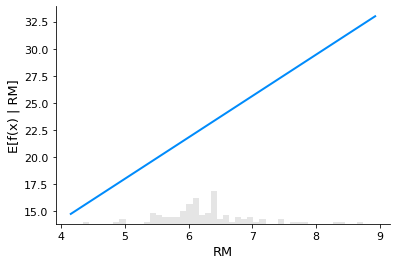

In [65]:
shap.plots.partial_dependence('RM',model.predict,X100,ice=False)

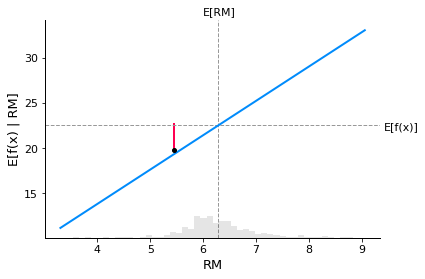

In [66]:
explainer = shap.Explainer(model.predict,X100)
shap_values = explainer(X)
shap.partial_dependence_plot('RM',model.predict,X,ice=False,
                             model_expected_value=True, 
                             feature_expected_value=True,
                            shap_values=shap_values[18:19,:])

In [67]:
shap_values[18:19,:]

.values =
array([[ 0.29059334, -0.57816681, -0.04899326, -0.16120403,  0.2343416 ,
        -3.09292477, -0.02126306,  0.00830301, -1.7046956 ,  1.16117867,
        -2.45904061, -0.70848594,  0.41697301]])

.base_values =
array([22.84139551])

.data =
array([[  0.80271,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.456  ,
         36.6    ,   3.7965 ,   4.     , 307.     ,  21.     , 288.99   ,
         11.69   ]])

In [68]:
X[18:19]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69


In [69]:
model.predict(X[18:19])

array([16.17801106])

In [70]:
shap_values[18:19,:].values.sum() + shap_values[18:19,:].base_values

array([16.17801106])

In [71]:
!pip install catboost

In [72]:
shap.initjs()

In [73]:
import catboost

In [74]:
from catboost.datasets import *

In [75]:
train_df, test_df = catboost.datasets.amazon()

In [76]:
train_df

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [77]:
set(train_df.ACTION)

{0, 1}

In [78]:
y_train = train_df.ACTION
X_train = train_df.drop('ACTION',axis=1)
cat_features = list(range(0,X_train.shape[1]))

In [91]:
from catboost import Pool, CatBoostClassifier, cv
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=300,
                           learning_rate=0.1,
                           random_seed=12)

# Fit model
model.fit(X_train,y_train,cat_features=cat_features,verbose=False,plot=False)


In [92]:
eval_dataset = [X_train.iloc[0:1]]

In [93]:
eval_dataset

[   RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  ROLE_TITLE  \
 0     39353   85475         117961         118300         123472      117905   
 
    ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
 0            117906       290919     117908  ]

In [95]:
# Get predicted classes
preds_class = model.predict(X_train)

# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_train)

# Get predicted RawFormulaVal
preds_raw = model.predict(X_train, 
                          prediction_type='RawFormulaVal')

In [96]:
preds_class

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
preds_proba

array([[0.00297943, 0.99702057],
       [0.00755915, 0.99244085],
       [0.02821131, 0.97178869],
       ...,
       [0.0070813 , 0.9929187 ],
       [0.06345848, 0.93654152],
       [0.02530578, 0.97469422]])

In [98]:
preds_raw

array([5.81304005, 4.87740873, 3.53941527, ..., 4.94319089, 2.69180808,
       3.65109105])

In [99]:
import numpy as np

In [100]:
np.log(0.9964/(1-0.9964))

5.6232149379259475

In [101]:
np.exp(5.62)/(1+np.exp(5.62))

0.9963884494655685

In [102]:
cat_features

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [1]:
# Script

In [45]:
import pandas as pd
import shap
import sklearn

# boston Housing price prediction
X,y = shap.datasets.boston()
X100 = shap.utils.sample(X, 1000) # 1000 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [46]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


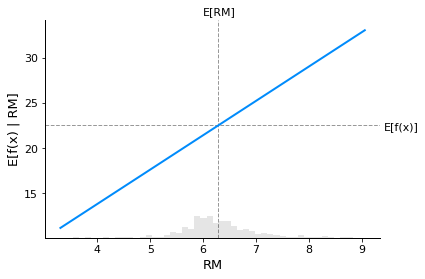

In [47]:
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Permutation explainer: 507it [00:10,  1.97it/s]                         


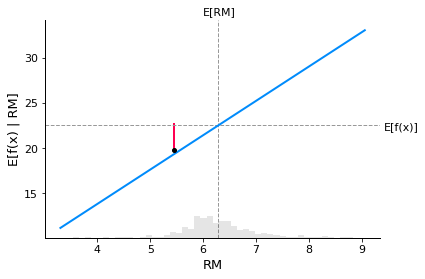

In [48]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

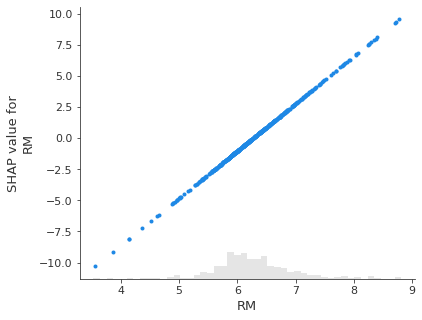

In [6]:
shap.plots.scatter(shap_values[:,"RM"])

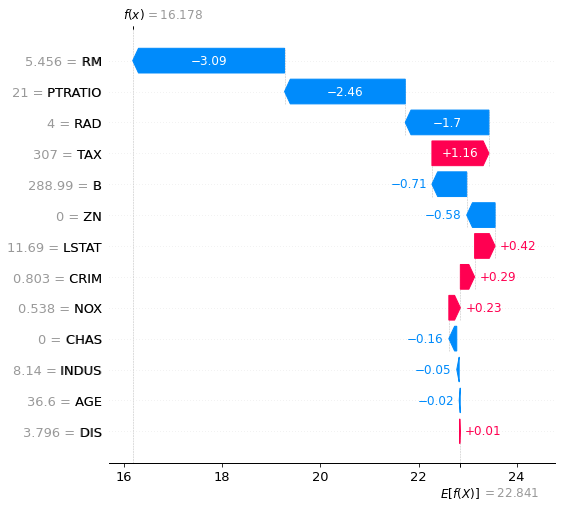

In [7]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [15]:
!pip install interpret-core #this installation is without any dependency library

  Using cached interpret_core-0.2.6-py3-none-any.whl (6.5 MB)


Permutation explainer: 507it [00:37,  9.78it/s]                         


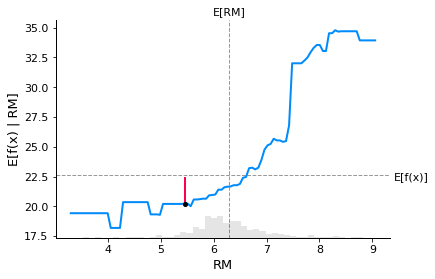

In [16]:
# fit a GAM model to the data
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "RM", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

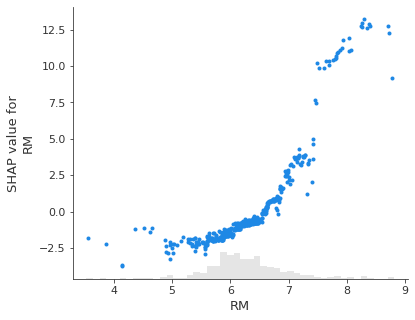

In [17]:
shap.plots.scatter(shap_values_ebm[:,"RM"])

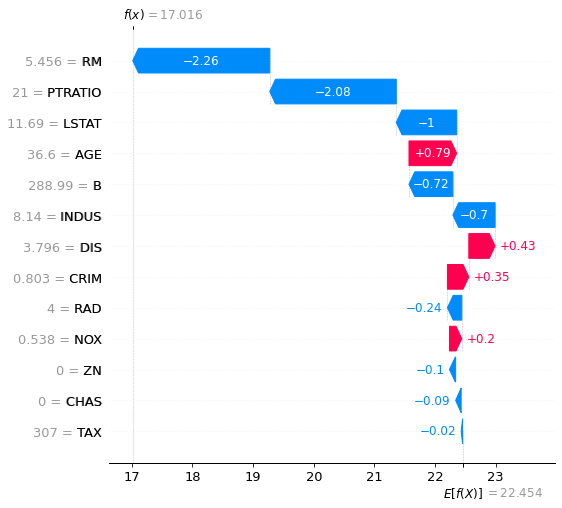

In [18]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=14)

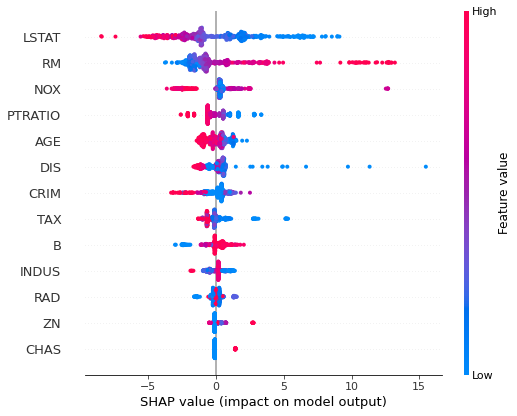

In [19]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm, max_display=14)

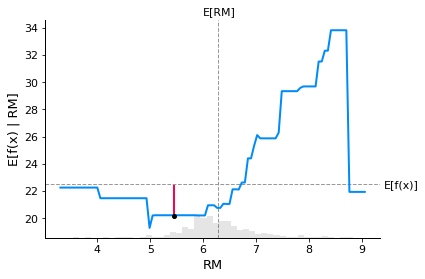

In [20]:
# train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "RM", model_xgb.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

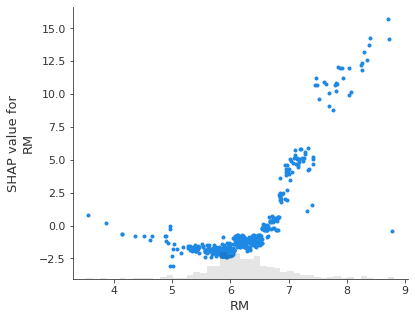

In [21]:
shap.plots.scatter(shap_values_xgb[:,"RM"])

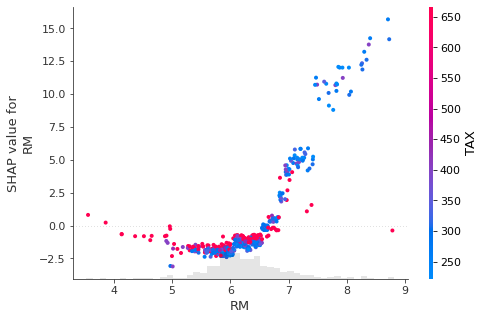

In [22]:
shap.plots.scatter(shap_values_xgb[:,"RM"], color=shap_values)

In [23]:
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

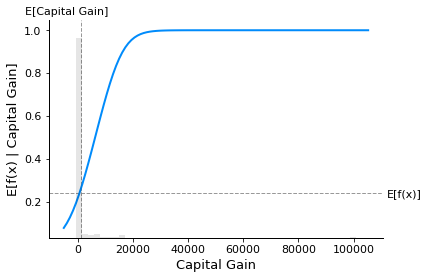

In [24]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Capital Gain", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)



In [25]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_adult, max_samples=100)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

Permutation explainer: 1001it [00:31, 21.90it/s]                         


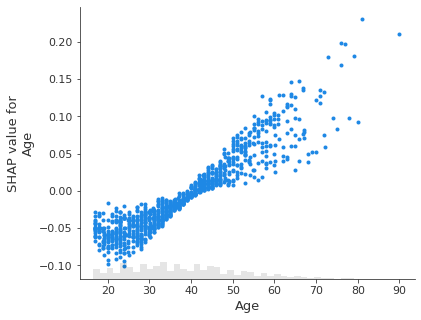

In [26]:
shap.plots.scatter(shap_values_adult[:,"Age"])


In [27]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)
shap_values_adult_log_odds = explainer_log_odds(X_adult[:1000])

Permutation explainer: 1001it [00:29, 22.08it/s]                          


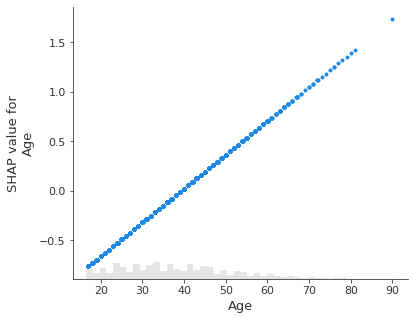

In [28]:
shap.plots.scatter(shap_values_adult_log_odds[:,"Age"])

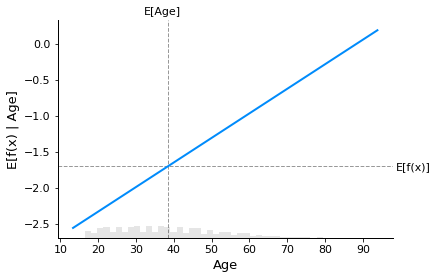

In [29]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Age", model_adult_log_odds, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)



In [30]:
# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_adult, y_adult)

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X_adult)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:45:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|===================| 32496/32561 [00:24<00:00]        

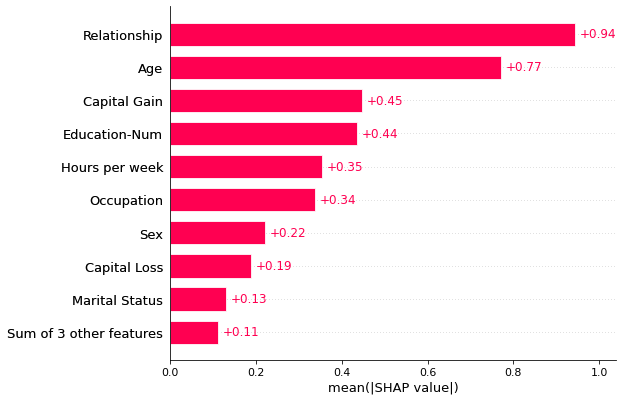

In [31]:
shap.plots.bar(shap_values)

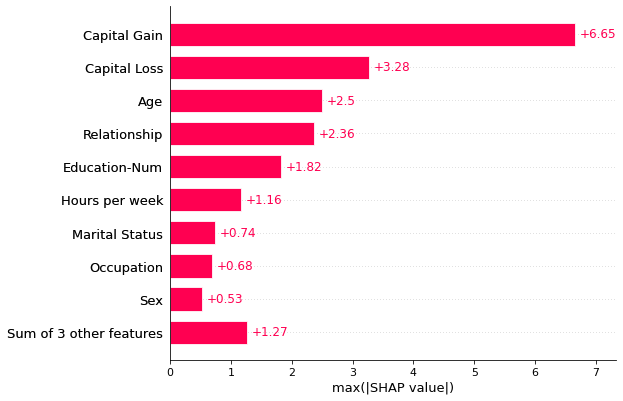

In [32]:
shap.plots.bar(shap_values.abs.max(0))

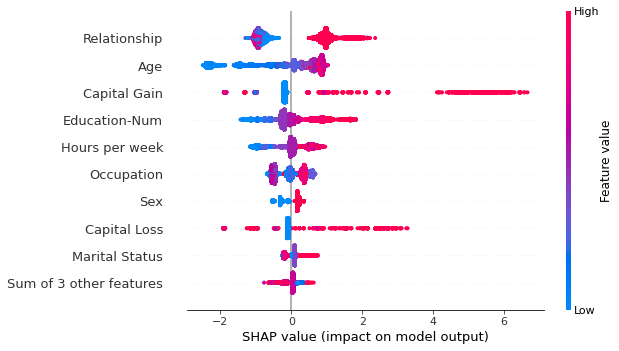

In [33]:
shap.plots.beeswarm(shap_values)

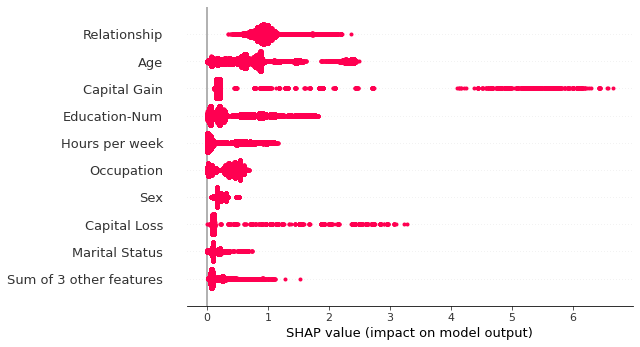

In [34]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

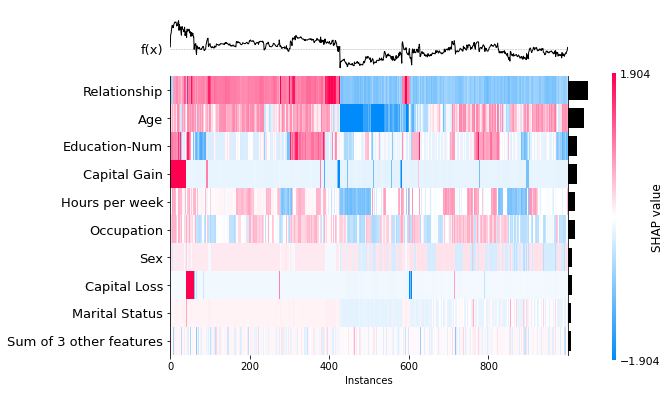

In [35]:
shap.plots.heatmap(shap_values[:1000])

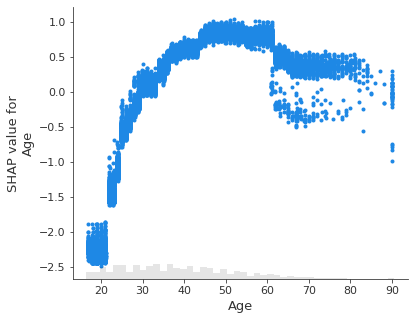

In [36]:
shap.plots.scatter(shap_values[:,"Age"])

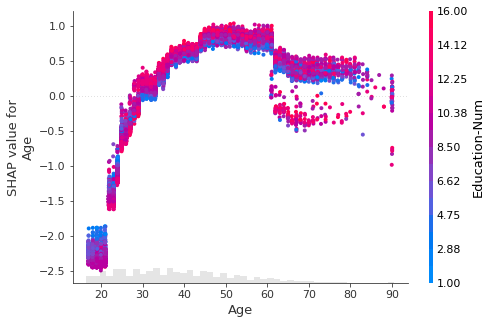

In [37]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)

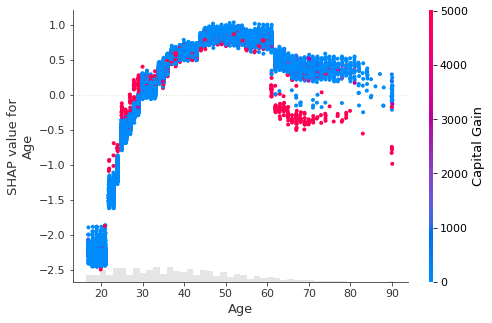

In [38]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"Capital Gain"])

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


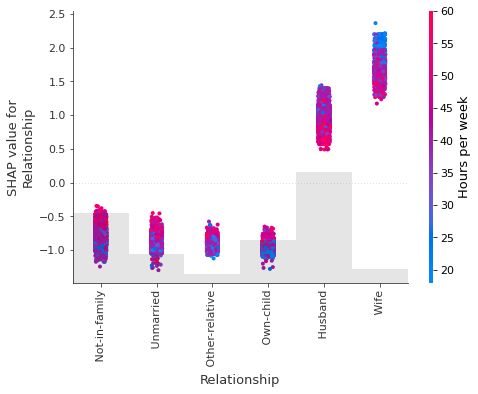

In [39]:
shap.plots.scatter(shap_values[:,"Relationship"], color=shap_values)

In [40]:
clustering = shap.utils.hclust(X_adult, y_adult)

13it [00:11,  5.57s/it]                


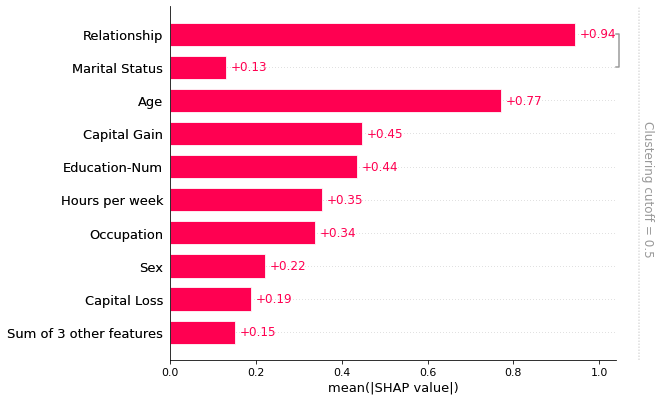

In [41]:
shap.plots.bar(shap_values, clustering=clustering)

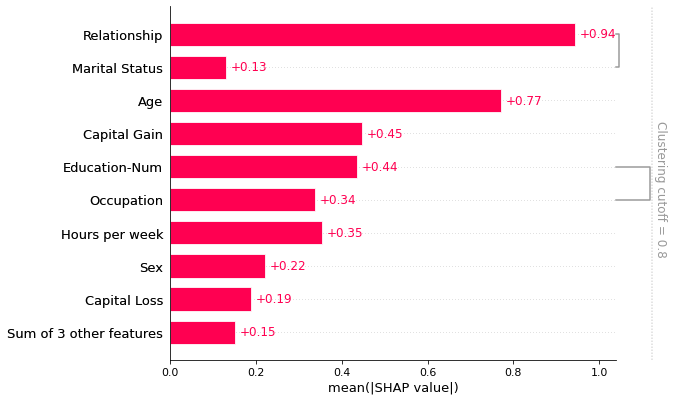

In [42]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

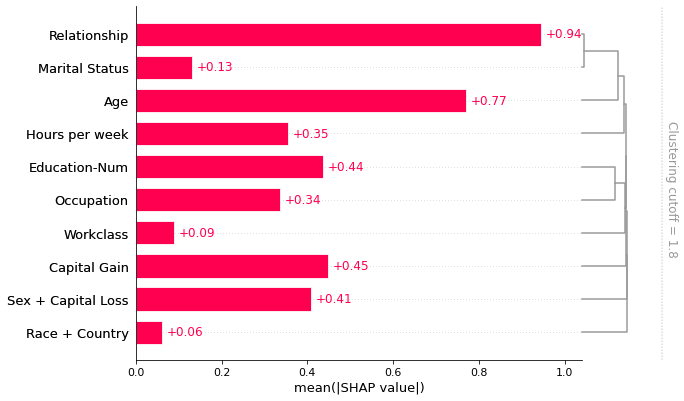

In [43]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)

In [125]:
from catboost.datasets import *
train_df, test_df = catboost.datasets.amazon()
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)
cat_features = list(range(0, X.shape[1]))

In [126]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=12)
model.fit(X, y, cat_features=cat_features, verbose=False, plot=False)

In [127]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))


In [128]:
test_objects = [X.iloc[7:9], X.iloc[56:58]]

for obj in test_objects:
    print('Probability of class 1 = {:.4f}'.format(model.predict_proba(obj)[0][1]))
    print('Formula raw prediction = {:.4f}'.format(model.predict(obj, prediction_type='RawFormulaVal')[0]))
    print('\n')

Probability of class 1 = 0.9927
Formula raw prediction = 4.9099


Probability of class 1 = 0.9368
Formula raw prediction = 2.6957




In [129]:
test_objects

[   RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  ROLE_TITLE  \
 7     19666    4209         117961         117969         118910      126820   
 8     31246     783         117961         118413         120584      128230   
 
    ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
 7            269034       118638     126822  
 8            302830         4673     128231  ,
     RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  ROLE_TITLE  \
 56     33150    1915         117961         118300         119181      118784   
 57     34817    5899         117961         118327         120318      118641   
 
     ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
 56            117906       290919     118786  
 57            240982       118643     118644  ]

In [137]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [131]:
shap.force_plot(explainer.expected_value, shap_values[91,:], X.iloc[91,:])

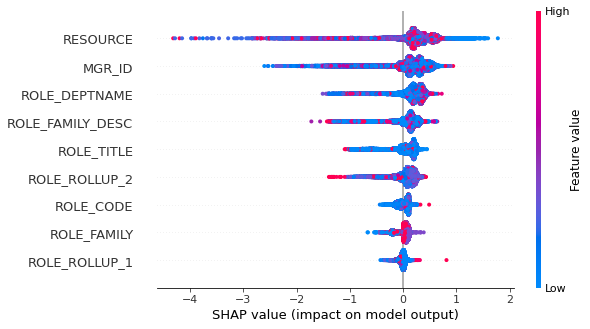

In [114]:
shap.summary_plot(shap_values, X)

In [115]:
model = CatBoostClassifier(loss_function = 'MultiClass', iterations=300, learning_rate=0.1, random_seed=123)
model.fit(X, y, cat_features=cat_features, verbose=False, plot=False)

In [116]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

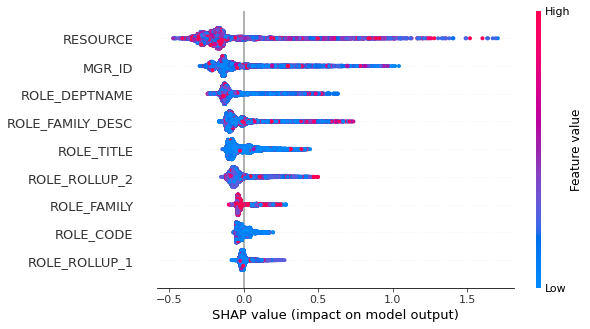

In [117]:
shap.summary_plot(shap_values[0], X)

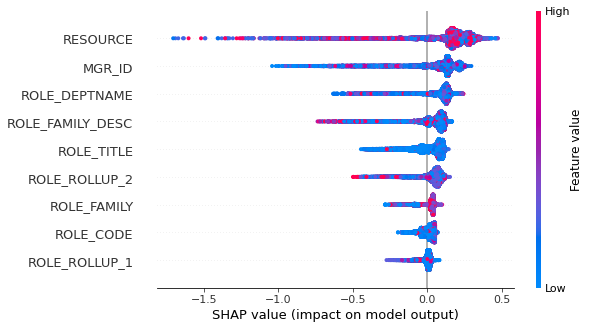

In [118]:
shap.summary_plot(shap_values[1], X)